# Equações diferenciais, estabilidade e aplicações

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste será automaticamente criada para você no seu Google Drive, você pode usar essa cópia mesmo, sem necessidade de criar outra.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   A atividade vai ser baseada no seu número USP.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo as perguntas das atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:* Luiz Eduardo Tojal Ramos Santos



---



## Preliminares

In [ ]:
import numpy as np                  #Numpy
import matplotlib.pyplot as plt     # Gráficos/figuras
from prettytable import PrettyTable #Tabelas mais bonitinhas

Referências:
*   https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html

#### ❗Exercício 0❗

Preencha o seu número USP abaixo

In [ ]:
# Coloque aqui o seu número USP
nusp = 11764386

nusp_str=str(nusp).replace("0","")

magic_ilong = int(nusp_str)
magic_int = int(str(magic_ilong)[-1:])*10
#magic_int = int(list(set(nusp_str))[0])

print("magic_ilong  =", magic_ilong)
print("magic_int =", magic_int)

magic_ilong  = 11764386
magic_int = 60




---



## O problema de Valor Inicial

Nosso problema em questão é o de achar uma função $u \in \mathcal{C}^1([t_0, T])$, que resolva a equação
$$
u'(t) = f(t,u(t)),
$$
para uma dada função $f(t,u)$, suficientemente suave, considerando conhecido o valor inicial de $u$,
$$
u(t_0)=u_0.
$$

Este problema é conhecido como problema de valor inicial, ou problema de Cauchy.

Observações:
*   A função $u$ pode ser uma função com imagem em $\mathbb{R}$ ou em $\mathbb{R}^n$, isto é, $u$ pode ser uma função vetorial
*   Se $u$ é vetorial ($u:[t_0, T] → \mathbb{R}^n$), então $f$ também deve ser, ($f:[t_0, T]\times \mathbb{R}^n → \mathbb{R}^n$), assim como $u_0\in \mathbb{R}^n$.
*   Nesses casos vetoriais, temos um sistema de equações diferenciais.



---



## Discretização

Vamos discretizar o tempo dividindo o intervalo de tempo em $n$ subintervalos uniformemente espaçados, obtendo
 $$t_k=\frac{k}{n}(T-t_0)+t_0, \quad k=0, 1, ..., n.$$

 Chamaremos o passo de tempo de $h$,
 $$
h= \frac{T-t_0}{n}.
 $$

Definimos $u_k$ como sendo uma aproximação da função desejada no tempo $t_k$, isto é,

$$
u_k \approx u(t_k)
$$

Nosso objetivo é obter boas aproximações para $u(t_k)$.

Da série de Taylor, sabemos que
$$
u(t_{k+1})=u(t_k)+hu'(t_k)+O(h^2).
$$
Usando a definição do problema de Cauchy, temos que
$$
u(t_{k+1})=u(t_k)+hf(t_k, u(t_k))+O(h^2).
$$

Isso é a base para a construção do método de Euler para resolução do problema de valor inicial. O método de Euler é então dado por
$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
que está bem definido se $u_0$ for dado.


### Primeiro Exemplo

Considere o problema de valor inicial dado por

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

In [ ]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


Campo vetorial e soluções "tangentes":

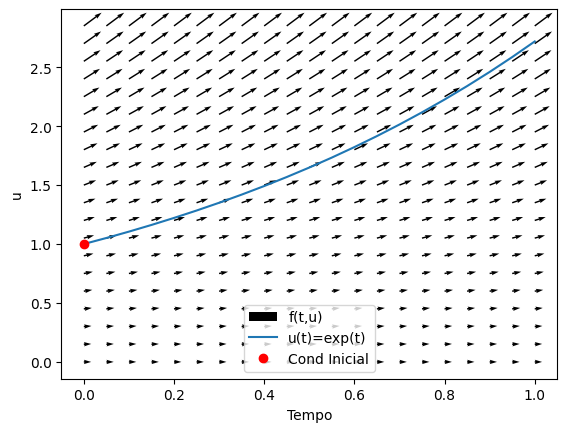

In [ ]:
n = 20

#Grade de plotagem
t_tmp = np.linspace(t0, T, n+1)
u_tmp = np.arange(0, 3, 0.15)
t_grid, u_grid = np.meshgrid(t_tmp, u_tmp)

# du/dt=f(t,u)
# Gradient (dt/dt, du/dt) = (1, f(t,u))
DT = np.ones_like(t_grid) # 1
DU = u_grid  # lambda u

#Flow
u0=1
u_t = np.exp(t_tmp)

fig, ax = plt.subplots()
q = ax.quiver(t_grid, u_grid, DT, DU, angles='xy', label="f(t,u)")
ax.plot(t_tmp, u_t, label="u(t)=exp(t)")
ax.plot(0.0, u0, 'ro', label="Cond Inicial")
ax.set_xlabel("Tempo")
ax.set_ylabel("u")
plt.legend()
plt.show()

Implementação de um primeiro método numérico: Euler

In [ ]:
# O método de Euler
def euler(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1)
  u[0]=u0
  for k in range(1,n+1):
    tk = t0+k*h
    u[k]=u[k-1]+h * f(tk, u[k-1])
  return u

In [ ]:
n = 10

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])
print(tab)

+----+--------------+-------------------+-------------------+
| n  |   u Euler    |      u Exata      |      Erro Max     |
+----+--------------+-------------------+-------------------+
| 10 | 2.5937424601 | 2.718281828459045 | 0.124539368359045 |
+----+--------------+-------------------+-------------------+


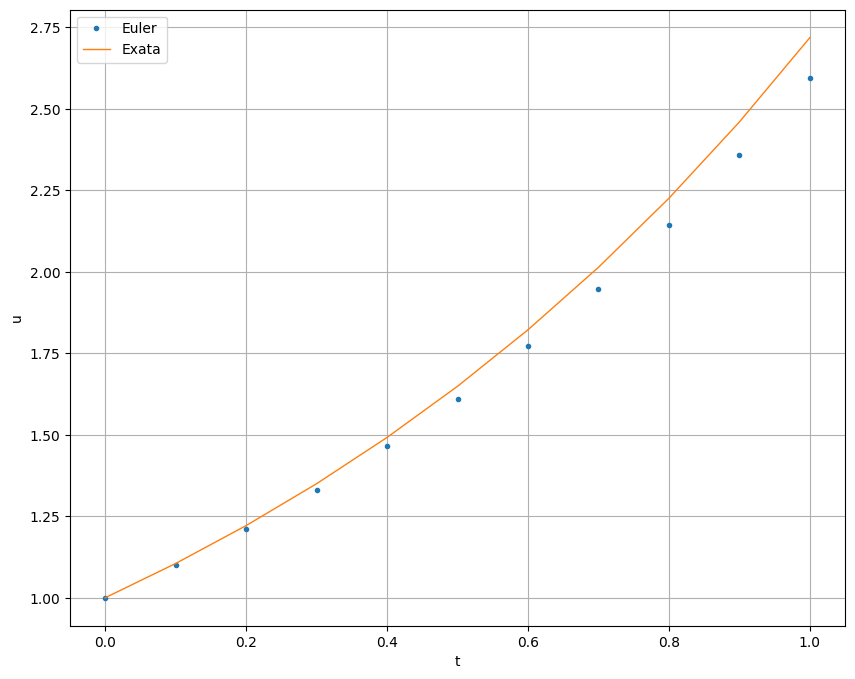

In [ ]:
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox, '.', label="Euler", linewidth=1)
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()



---



Questão importante:

>  O que acontece com o erro quando aumentamos o número de pontos no tempo? (diminuímos $h$).


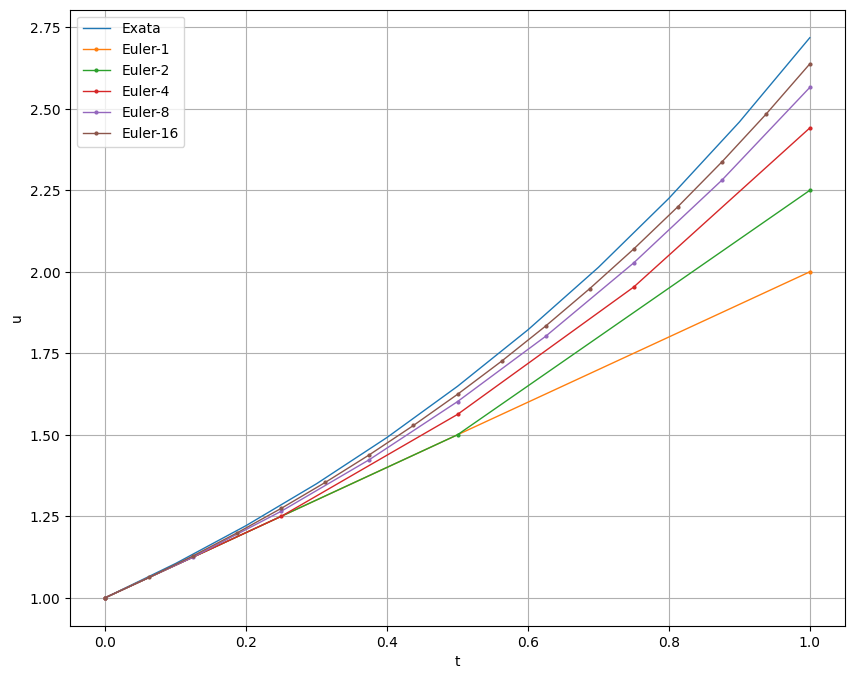

+----+--------------------+-------------------+---------------------+
| n  |      u Euler       |      u Exata      |       Erro Max      |
+----+--------------------+-------------------+---------------------+
| 1  |        2.0         | 2.718281828459045 |  0.7182818284590451 |
| 2  |        2.25        | 2.718281828459045 |  0.4682818284590451 |
| 4  |     2.44140625     | 2.718281828459045 |  0.2768755784590451 |
| 8  | 2.565784513950348  | 2.718281828459045 |  0.1524973145086972 |
| 16 | 2.6379284973665995 | 2.718281828459045 | 0.08035333109244558 |
+----+--------------------+-------------------+---------------------+


In [ ]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
n_list = [1, 2, 4, 8,  16]

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final = np.abs(u_aprox[-1]-u_exata[-1])
  tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])

  plt.plot(t, u_aprox, '-o', label="Euler-"+str(n), linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

print(tab)

In [ ]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for n in range(10):
  n = 2**n
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


print(tab)

+-----+--------------------+-------------------+-----------------------+--------------------+
|  n  |      u Euler       |      u Exata      |        Erro Max       |       Razão        |
+-----+--------------------+-------------------+-----------------------+--------------------+
|  2  |        2.25        | 2.718281828459045 |   0.4682818284590451  | 1.5338665410585421 |
|  4  |     2.44140625     | 2.718281828459045 |   0.2768755784590451  | 1.6913078107692783 |
|  8  | 2.565784513950348  | 2.718281828459045 |   0.1524973145086972  | 1.8156095361486144 |
|  16 | 2.6379284973665995 | 2.718281828459045 |  0.08035333109244558  | 1.897834382662379  |
|  32 | 2.6769901293781833 | 2.718281828459045 |  0.04129169908086183  | 1.9459923636246856 |
|  64 |  2.6973449525651   | 2.718281828459045 |  0.020936875893945217 | 1.9721996390494474 |
| 128 | 2.7077390196880193 | 2.718281828459045 |  0.010542808771025758 | 1.985891648863529  |
| 256 | 2.712991624253433  | 2.718281828459045 | 0.005290204

Note que o erro cai pela metade (aproximadamente) quando dobramos o número de pontos (reduzimos o $h$ pela metade). Logo, dizemos que o método é de primeira ordem $O(h^1)$.

Isso será, ou foi, demonstrado em sala nas aulas teóricas.



---



###❗Exercício 1❗

Considere o problema de valor inicial

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

Vamos analisar esse problema agora com $\lambda < 0 $. Neste caso, a solução deveria ser decrescente com o avanço do tempo. Será que a solução numérica sempre decresce no tempo?

Atividade:
1.   Defina $\lambda = -$ magic_int, ou seja, o $\lambda$ será "menos" o valor do seu último dígito não nulo do número usp multiplicado por 10.
2.   Resolva o problema usando o método de Euler com 100 passos de tempo, isto é, $n=100$, $h=1/100$.
3.   Faça um gráfico da solução e verifique que a solução numérica vai para zero, assim como a solução teórica.
4.    Reduza o valor de $n$ progressivamente, e observe o comportamento da solução. Qual o menor valor de $n$ tal que o método continua indo para zero com o avanço do tempo? Há algum $n$ tal que o erro fique muito grande?

**Reporte** ao professor o menor $n$ que encontrou tal que o método "funcione", isto é, tem erro menor que 1.



In [ ]:
# Códigos
lam = -magic_int

def f(t, u):
  return lam*u

def u(t):
  return np.exp(lam*t)

n = 31

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])
print(tab)


+----+--------------------+----------------------+-------------------+
| n  |      u Euler       |       u Exata        |      Erro Max     |
+----+--------------------+----------------------+-------------------+
| 31 | -0.126510166119975 | 8.75651076269652e-27 | 0.126510166119975 |
+----+--------------------+----------------------+-------------------+


n = 31 é o menor valor tal que o erro é inferior a 1.0



---



### Teoria de Estabilidade

>  Por que dependendo do $h$ o método simplesmente explode?

O problema

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t > 0 \\
u(0) = u_0
\end{cases}
$$

com $\lambda< 0$ é conhecido como problema modelo. É um problema simples para o qual a solução deve sempre decair a zero quando o tempo evolui. Ele é usado como teste de estabilidade de métodos numéricos:
> Dizemos que um método numérico é absolutamente estável  (A-estável) quando o comportamento numérico dele no problema modelo se assemelha do esperado teórico. Isto é, o método é instável quando a solução do método numérico não fica limitada, ou **cresce**, no tempo quando usamos $\lambda$ negativo.


#### Estabilidade de Euler

Vejamos o caso do método de Euler.

$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
mas para o problema modelo $f(t,u)=\lambda u$, então
$$
u_{k+1}=u_k+h\lambda u_k = (1+h\lambda) u_k.
$$

Portanto, a cada passo de tempo discreto o método evolui a solução multiplicando a anterior por $(1+h\lambda)$. Esse termo é conhecido como **Fator de Amplificação**.

A solução depois de alguns passos de tempo será
$$
u_{k}= (1+h\lambda)^k u_0,
$$
ou seja, teremos potências do fator de amplificação.

Para que o método seja A-estável, o fator de amplificação precisa estar limitado por 1 (em módulo) para que solução seja decrescente no tempo!

$$
|1+h\lambda| < 1 \\
⇔ \\
-1 < 1+h\lambda < 1 \\
⇔ \\
-2 < h\lambda < 0 .
$$
Portanto, o método é estável se $h\lambda \in (-2,0)$.




h : [0.5    0.25   0.125  0.0625]
λ h : [-5.    -2.5   -1.25  -0.625]


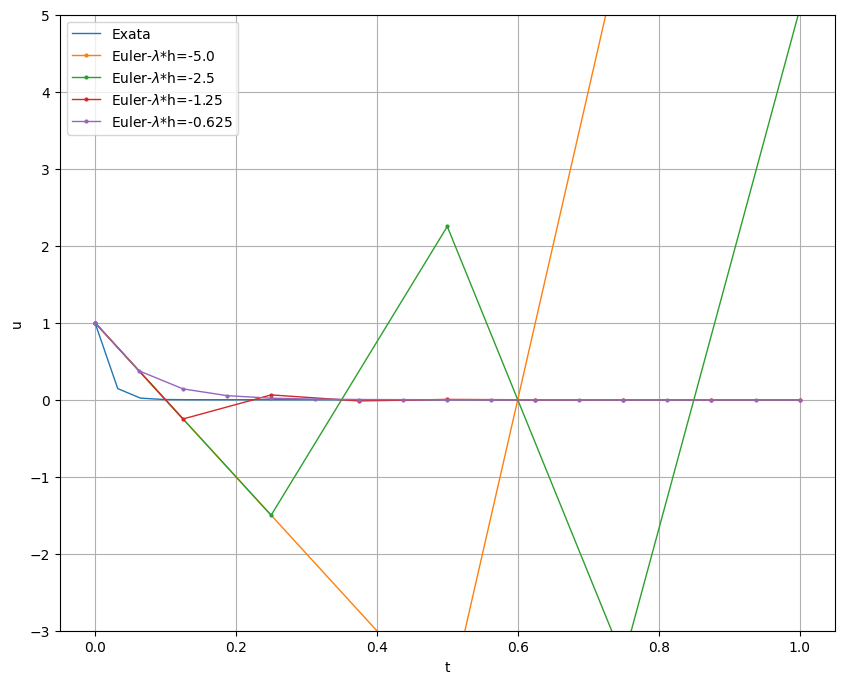

In [ ]:
#Exemplo
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = -10

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)


n_list = np.array([2, 4, 8,  16])
h_list = 1/n_list
print("h :", h_list)
print('\u03BB'+' h :',  lam*h_list)

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final = np.abs(u_aprox[-1]-u_exata[-1])

  plt.plot(t, u_aprox, '-o', label="Euler-$\lambda$*h="+str(lam*1/n), linewidth=1, markersize=2)

plt.ylim([-3, 5])
plt.grid()
plt.legend()
plt.show()



### Método de 2a ordem

Como vimos anteriormente, o método de Euler é um método de 1a ordem $O(h)$, isto é, quando reduzimos $h$ pela metade, o erro cai aproximadamente pela metade.

Podemos obter um método de segunda ordem, isto é, com erro da ordem de $h^2$, indicado por $O(h^2)$, usando o método explicito do trapézio, também conhecido como Euler Aprimorado:

$$
u_{k+1}=u_k+\frac{h}{2}\left( f(t_k, u_k)+f(t_k+h, u_k+hf(t_k, u_k))\right),
$$
que pode ser implementado em 2 estágios:
$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+h, u_k+h\kappa_1)\\
u_{k+1} = u_k+\frac{h}{2}\left(\kappa_1+\kappa_2 \right),
$$

É possível analisar a estabilidade deste método da mesma forma que antes, olhando para o problema modelo. Conclui-se que para o método ser estável devemos ter
$$\lambda h \in (-2, 0), $$
assim como no método de Euler. Por outro lado, o erro agora decai com $h^2$ quando reduzimos o $h$.


### ❗Exercício 2❗




1.  Implemente uma função de Python para o método de Euler Aprimorado, de forma similar ao feito para Euler, para um problema de Cauchy geral.

2.  Teste sua implementação no seguinte problema:

$$
\begin{cases}
u'(t)= u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$
usando $n = $ magic_int, ou seja, o $n$ será o valor do seu último dígito não nulo do número usp multiplicado por 10. (O método é estável com esse valor de $n$?)

3. Reporte o erro máximo encontrado para a estimativa de $u(1)$.

In [ ]:
## O método de Euler Aprimorado
def euler_aprim(u0, t0, T, f, n):

  h = (T-t0)/n
  u = np.empty(n+1)
  u[0]=u0
  for k in range(1,n+1):
    tk = t0+k*h
    k1 = f(tk, u[k-1])
    k2 = f(tk + h, u[k-1] + h*k1)
    u[k]=u[k-1]+ (h/2) * (k1+k2)

  return u

In [ ]:
t0 = 0
T = 1
u0 = 1.0
lam = 1
n = magic_int

def f(t, u):
  return lam*u

t = np.linspace(t0, T, n+1)
u_aprox = euler_aprim(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])
print(tab)


+----+--------------------+-------------------+------------------------+
| n  |      u Euler       |      u Exata      |        Erro Max        |
+----+--------------------+-------------------+------------------------+
| 60 | 2.7181575475128605 | 2.718281828459045 | 0.00012428094618455177 |
+----+--------------------+-------------------+------------------------+


## Aplicações: O Circuito de Chua


O circuito de Chua é um circuito elétrico simples formado por 2 capacitores lineares ($C_1$ e $C_2$), um resistor linear ($R$), um indutor linear ($L$) e um resistor não linear controlado pela tensão ($N_R$), conforme a figura abaixo.

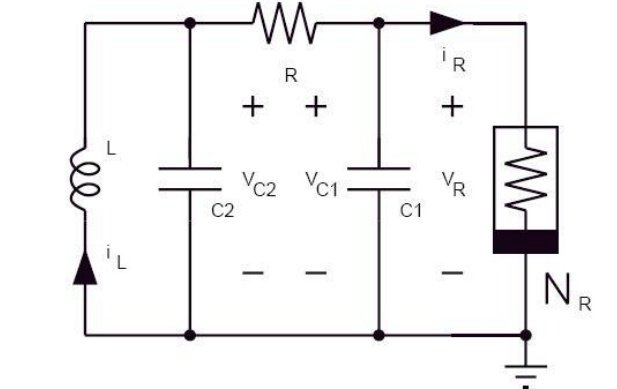


O resistor não linear $N_R$, conhecido como diodo de Chua, é definido de forma linear por pedaços, isto é, dependendo da tensão ele fornece uma resistência diferente. A corrente de $N_R$ é definida por
\begin{equation*}
g(V)=
\begin{cases}
G_b V + (G_b-G_a) E, &\quad \text{se} \quad V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad V \geq E\\
\end{cases}
\end{equation*}

onde $G_a$ e $G_b$ são inclinações das curvas da relação tensão ($V$) versus corrente ($i$) e $E>0$ é um valor de tensão de corte para mudança de regime, conforme o gráfico abaixo.

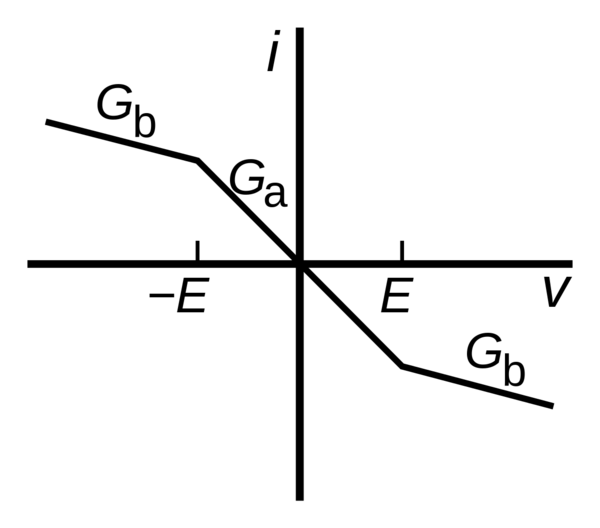


Usando as leis de  Kirchhoff para esse circuito é possível deduzirmos o seguinte sistema de equações diferenciais para as tensões nos capacitores ($V_{C_1}$ e $V_{C_2}$) e a corrente no indutor ($I_L$),
\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}


O interessante desse circuito é que ele é simples de ser montado (veja aqui: https://inst.eecs.berkeley.edu/~ee129/sp10/handouts/ChuasCircuitForHighSchoolStudents-PREPRINT.pdf ) e define um sistema dinâmico caótico, para o qual pequenas variações nos parâmetros e condições iniciais podem levar a soluções bastante distintas!

Vamos ver um exemplo de solução desse problema baseado em http://www.chuacircuits.com/ !

#### Exemplo de Circuito de Chua


Vamos considerar os seguintes parâmetros fixados:

*   Alimentação por bateria de $9V$
*   $C_1  =  10 nF $
*   $C_2 = 100 nF $
*   $L = 18 mH $

Para o resistor não linear considerar:
*  $E=1.17391304 V,$
*  $G_a=-50/66 mS,$
*  $G_b=-9/22 mS. $

Para simular um comportamento passível de ser implementado fisicamente, o resistor não linear precisa de parâmetros adicionais para manter o sistema dentro de tensões realizáveis. Considere que a equação definida anteriormente para o resistor não linear é válida para tensões em módulo menores que $E_{\max}$. Para tensões maiores do que isso, considerar
\begin{equation*}
g(V)=
\begin{cases}
G_c V + E_{\max} (G_c-G_b) +  E (G_b-G_a) & \quad \text{se} \quad V \leq -E_{\max} \\
G_b V + (G_b-G_a) E, &\quad \text{se} \quad -E_{\max} < V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad E \leq V < E_{\max}\\
G_c V + E_{\max} (G_b-G_c) +  E (G_a-G_b) & \quad \text{se} \quad  E_{\max} \leq V \\
\end{cases}
\end{equation*}
Adotaremos $E_{\max}=8.1818$ V e $G_c=4.591$ mS.



In [ ]:
#Definindo os parâmetros
C1 = 10*10**(-9)
print("C1 =", C1 , "F")

C2 = 100*10**(-9)
print("C2 =", C2 , "F")

L = 18*10**(-3)
print("L =", L , "H")

E = 1.17391304
print("E =", E , "V")

Emax = 8.1818
print("Emax =", Emax , "V")

Ga =-(50/66)*10**(-3)
print("Ga =", Ga , "S")

Gb =-(9/22)*10**(-3)
print("Gb =", Gb , "S")

Gc = 4.591*10**(-3)
print("Gc =", Gc , "S")

R = 1800
print("R =", R , "Ohms")

C1 = 1e-08 F
C2 = 1.0000000000000001e-07 F
L = 0.018000000000000002 H
E = 1.17391304 V
Emax = 8.1818 V
Ga = -0.0007575757575757576 S
Gb = -0.00040909090909090913 S
Gc = 0.0045910000000000005 S
R = 1800 Ohms


In [ ]:
# Função g
#  (não é vetorial por conta dos ifs!)
def g(V):
  if V <= -Emax:
    return Gc*V+Emax*(Gc-Gb)+E*(Gb-Ga)
  if V <= -E:
    return Gb*V+E*(Gb-Ga)
  if V <= E:
    return Ga*V
  if V <= Emax:
    return Gb*V+E*(Ga-Gb)
  if V >= Emax:
    return Gc*V+Emax*(Gb-Gc)+E*(Ga-Gb)


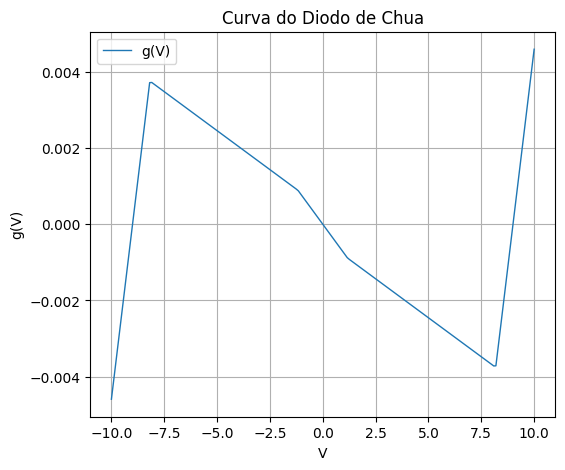

In [ ]:
#Voltagens de teste para gráfico da função g
v = np.linspace(-10, 10, 200)
gv = np.zeros_like(v)
for i, vi in enumerate(v):
  gv[i] = g(vi)

figure, axs = plt.subplots(figsize=(6,5))
plt.title("Curva do Diodo de Chua")
plt.xlabel("V")
plt.ylabel("g(V)")
plt.plot(v, gv, '-', label="g(V)", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

Agora vamos montar o sistema de EDOs:


\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}

In [ ]:
# EDO
# u[0] = Vc1
# u[1] = Vc2
# u[2] = Il

def f(t, u):
  f1 = (u[1]-u[0])/(R*C1)-g(u[0])/C1
  f2 = (u[0]-u[1])/(R*C2)+u[2]/C2
  f3 = -u[1]/L
  return np.array([f1, f2, f3])


Vamos usar o método de Euler aprimorado para resolver o problema, mas precisamos ajustá-lo para ser vetorial (para um sistema de EDOs).


In [ ]:
## O método de Euler Aprimorado vetorial
def euler_aprim_vet(u0, t0, T, f, n):
  h = (T-t0)/n
  dim = u0.size
  u = np.empty((n+1,dim))
  u[0, :]=u0
  for k in range(1,n+1):
    tk = t0+k*h
    kappa1 = f(tk, u[k-1, :])
    kappa2 = f(tk+h, u[k-1, :]+h*kappa1)
    u[k, :]=u[k-1, :]+h * (kappa1+kappa2)/2.0
    if np.max(np.max(u[k, :])) > 10e5:
      print("Método instável...desisto!")
      return u
  return u

Uma alternativa é usar o Runge Kutta de 4a ordem e 4 estágios (RK-44)

In [ ]:
## O método de Runge-Kutta 4 4
def rk44_vet(u0, t0, T, f, n):
  h = (T-t0)/n
  dim = u0.size
  u = np.empty((n+1,dim))
  u[0, :] = u0
  print(0, u[0,:])
  for k in range(1,n+1):
    tk = t0+k*h
    kappa1 = f(tk, u[k-1, :])
    kappa2 = f(tk+h/2, u[k-1, :]+h*kappa1/2)
    kappa3 = f(tk+h/2, u[k-1, :]+h*kappa2/2)
    kappa4 = f(tk+h, u[k-1, :]+h*kappa3)
    u[k, :]=u[k-1, :]+h * (kappa1+2*kappa2+2*kappa3+kappa4)/6.0
    #print(k, u[k,:])
    if np.max(np.max(u[k, :])) > 10e5:
      print("Método instável...desisto!")
      return u
  return u

Assumimos como condições iniciais $V_{C_1}=-0.5V$, $V_{C_2}=-0.2$ e $I_L=0$. Vamos variar o valor do resistor ($R$) nos experimentos a seguir.

0 [-0.5 -0.2  0. ]


Text(0, 0.5, 'VC1')

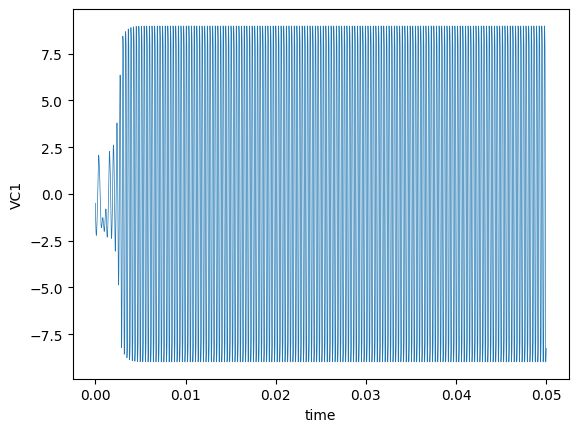

In [ ]:
#condição inicial
t0 = 0
u0 = np.zeros(3)
u0[0] = -0.5 # Volts -- VC1
u0[1] = -0.2 # Volts -- VC2
u0[2] = 0.0  # Amps -- IL

T = 50*10**-3 # 50 ms - Tempo final em Segundos

#h=(T-t0)/n
h = 0.001*10**-3   # 0.01 ms - tamanho do passo (seg)
#n = 1000000     #Passos de tempo
n = int((T-t0)/h)
t = np.linspace(t0, T, n+1)

#Resistência (vamos variar esse parâmetro)
R = 1500 #

#Resolve o sistema de EDOs!
#u = euler_aprim_vet(u0, t0, T, f, n)
u = rk44_vet(u0, t0, T, f, n)

#Código usando função de Python para integrar a EDO
#from scipy.integrate import odeint
#u = odeint(f, u0, t, tfirst=True )

plt.plot(t, u[:,0], linewidth=0.5)
plt.xlabel("time")
plt.ylabel("VC1")

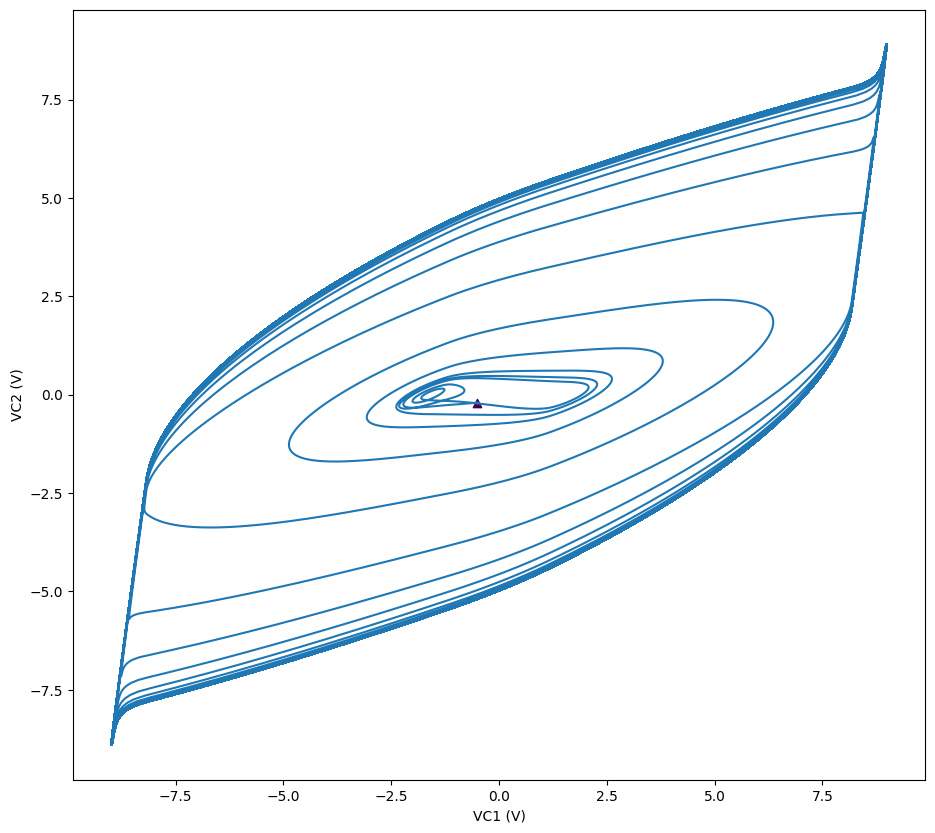

In [ ]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot()

vc1 = u[:,0]
vc2 = u[:,1]
il = u[:,2]/1000

ax.scatter(u0[0], u0[1], marker="^", c=10)
ax.plot(vc1, vc2)

ax.set_xlabel('VC1 (V)')
ax.set_ylabel('VC2 (V)')
#ax.set_zlabel('$I_L$ (mA)')
ax.set_aspect('auto')
plt.show()

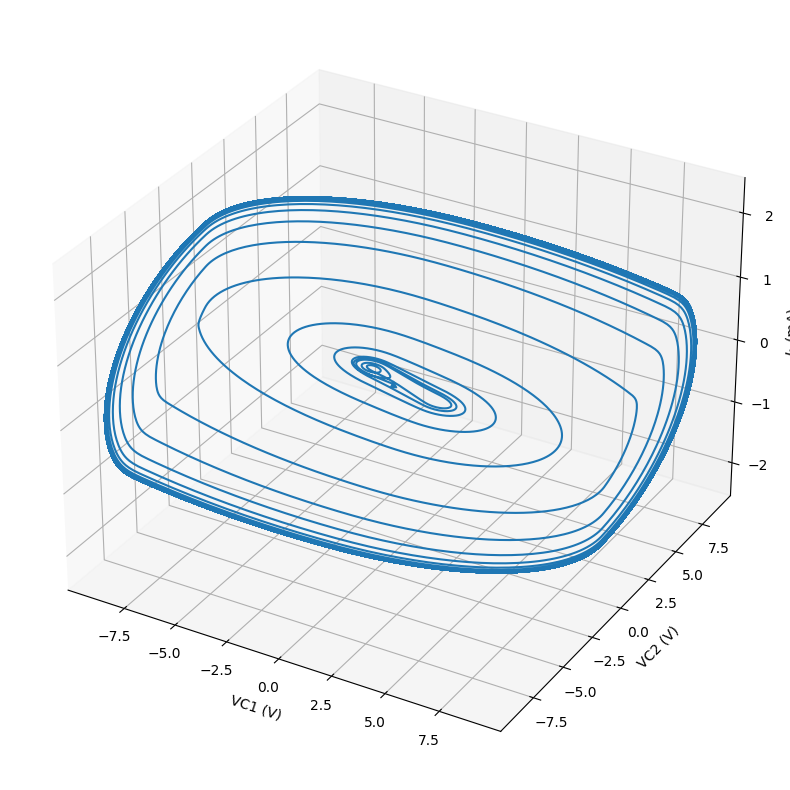

In [ ]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(projection='3d')


vc1 = u[:,0]
vc2 = u[:,1]
il = u[:,2]/1000

ax.scatter(u0[0], u0[1], u0[2], marker="^")
ax.plot(vc1, vc2, il)

ax.set_xlabel('VC1 (V)')
ax.set_ylabel('VC2 (V)')
ax.set_zlabel('$I_L$ (mA)')
ax.set_aspect('auto')
plt.show()

(O zlabel as vezes fica fora da figura 😞 )

### ❗Exercício 3❗

Este sistema é um sistema que com características caóticas dependendo dos parêmetros. Vamos simular as características do sistema variando a resistência $R$, como faríamos no caso prático, girando um potenciômetro.

**Tarefa**: Simule o sistema nas condições indicadas abaixo, fazendo gráficos de exemplo para cada caso.

1.  Para que valores de $R$ o sistema converge para uma órbita periódica? Neste caso, passado um certo tempo (longo) o sistema fica rodando em ciclos, retornando a condições que já teve depois de um período.
2.  Para que valores de $R$ o sistema converge para um um ponto estacionário? (Ponto atrator, de equilíbrio do sistema).
3.  Encontre os valores críticos para os quais o sistema deixa de convergir para órbitas perídicas e passa a oscilar em um "atrator estranho" (parecem asas de borboleta?). Esses pontos são conhecidos como pontos de bifurcação do sistema.

As respostas podem ser aproximadas (valores de $R$). Tente comentar sobre o comportamento da solução em cada caso, e se há comportamentos diferentes dentre as possíveis órbitas perídicas.

**Observação:** O objetivo dessa atividade é verificar que mesmo em sistemas dinâmicos (sistemas de EDOs) originados de problemas práticos, neste caso um circuito eletrônico, as soluções podem ter características bem distintas dependendo dos parâmetros. Com isso, fica o alerta sobre a sensibilidade a parâmetros em certos problemas reais!


In [ ]:
# Códigos



Valores de $R$ das questões e comentários:

1.

2.

3.



---



---

